In [46]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ----------------- Load & Clean Data -----------------
df = pd.read_csv(r"C:\Users\sanke\Downloads\Diwali Sales Data.csv", encoding="latin1")

# Drop empty columns
df = df.drop(columns=["Status", "unnamed1"], errors="ignore")

# Drop null values
df = df.dropna(subset=["Amount"])






## Descriptive analysis

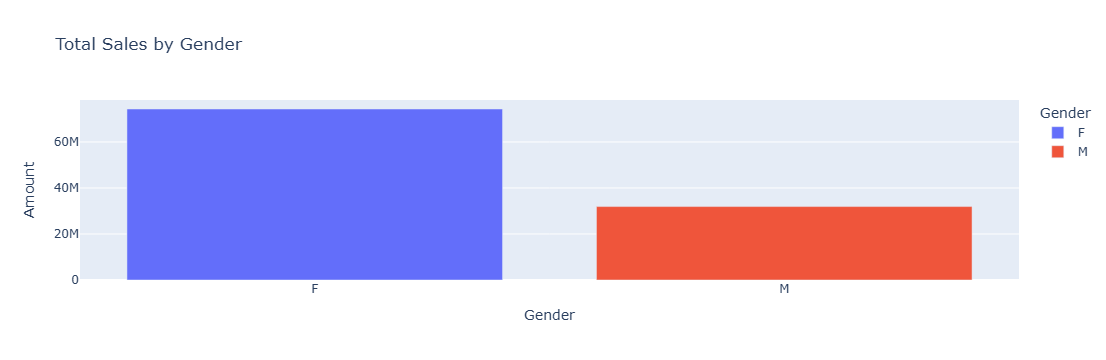

In [48]:
# 1. Sales by Gender
fig_gender = px.bar(df.groupby("Gender")["Amount"].sum().reset_index(),
                    x="Gender", y="Amount", color="Gender",
                    title="Total Sales by Gender")
fig_gender.show()

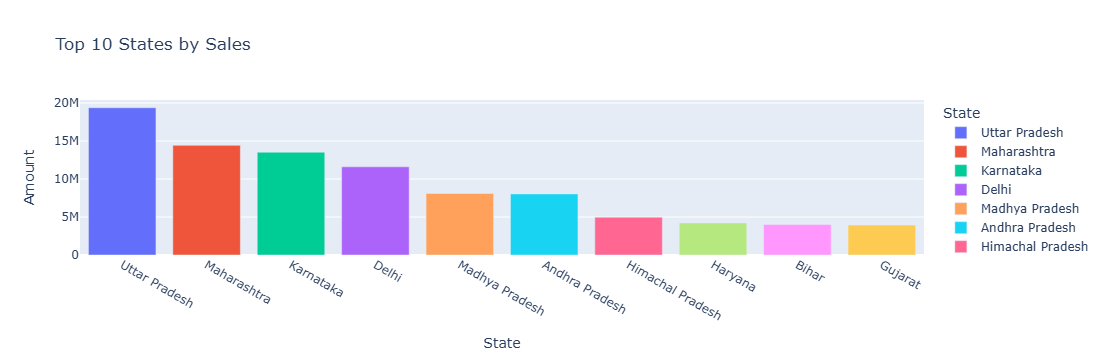

In [50]:
# 2. Sales by State
fig_state = px.bar(df.groupby("State")["Amount"].sum().nlargest(10).reset_index(),
                   x="State", y="Amount", color="State",
                   title="Top 10 States by Sales")

fig_state.show()

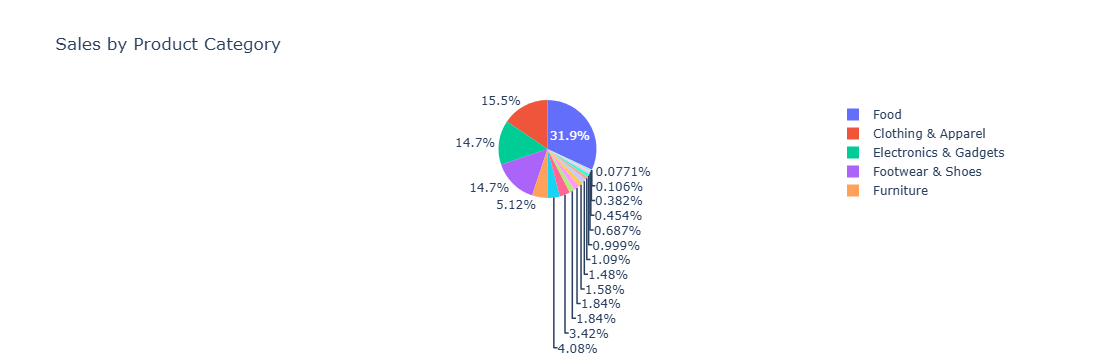

In [52]:
# 3. Sales by Product Category
fig_category = px.pie(df.groupby("Product_Category")["Amount"].sum().reset_index(),
                      names="Product_Category", values="Amount",
                      title="Sales by Product Category")

fig_category.show()

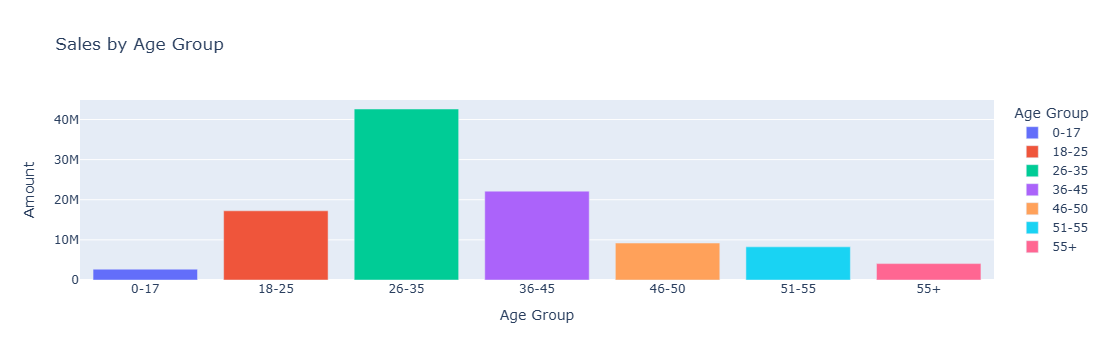

In [54]:
# 4. Sales by Age Group
fig_age = px.bar(df.groupby("Age Group")["Amount"].sum().reset_index(),
                 x="Age Group", y="Amount", color="Age Group",
                 title="Sales by Age Group")
fig_age.show()

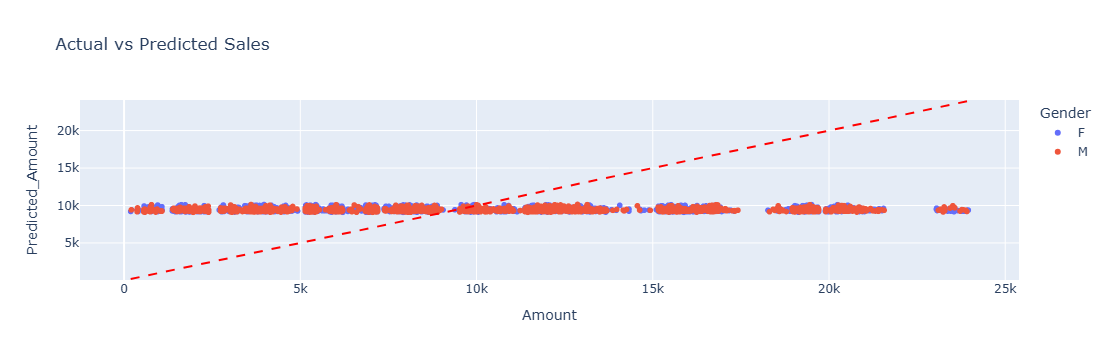

In [56]:
# Predictive analysis
X = df[["Age", "Orders"]]
y = df["Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

df["Predicted_Amount"] = lr.predict(X)

# Actual vs Predicted Plot
fig_pred = px.scatter(df, x="Amount", y="Predicted_Amount",
                      color="Gender", title="Actual vs Predicted Sales")
fig_pred.add_shape(type="line", x0=df["Amount"].min(), y0=df["Amount"].min(),
                   x1=df["Amount"].max(), y1=df["Amount"].max(),
                   line=dict(color="red", dash="dash"))